In [1]:
# 그래픽 카드 둘로 쓰기 (두개 있을때, 하나만 있다면 0)
# gpu idx 를 0 또는 1 로 설정하시오
import os
os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"]="{}".format(1) # gpu idx

In [2]:
# 경로에 폴더가 없으면 폴더 만들기
import os

def createDirectory(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print("Error: Failed to create the directory.")

In [3]:
import numpy as np
import itertools
import pickle

from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from tensorflow.keras import layers
from tensorflow import keras
import tensorflow as tf
from tqdm import tqdm

EPOCH = 200
KERNEL_SIZE = 3
POOLING_SIZE = 2
BATCH_SIZE = 128

DATA_PATH = "./mit_data/"

def list_to_list(input_list):
    input_list_to_list = list(itertools.chain(*input_list))
    return input_list_to_list

# 데이터 불러오기

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import pandas as pd
import numpy as np
import random
import pickle
import os

DATA_PATH = "./pickle_mat/"
print("[INFO] Read records file from ", DATA_PATH)
with open(DATA_PATH + 'RECORDS') as f:
    record_lines = f.readlines()

rList = []
for i in range(len(record_lines)):
    rList.append(str(record_lines[i].strip()))

path = './pickle_mat/'
pickle_input = dict()
X, y = [], []

sigN, sigV, sigS, sigF, sigQ = [], [], [], [], []
annN, annV, annS, annF, annQ = [], [], [], [], []

for i in tqdm(range(len(rList))):
    temp_path = path + "mitPssigP_" + rList[i] + ".pkl"
    with open(temp_path, 'rb') as f:
        pickle_input = pickle.load(f)

        for i in range(len(pickle_input[0])):
            check_ann = pickle_input[1][i]
    
            if check_ann == "N":
                sigN.append(pickle_input[0][i])
                annN.append(0)

            elif check_ann == "S":
                sigS.append(pickle_input[0][i])
                annS.append(1)

            elif check_ann == "V":
                sigV.append(pickle_input[0][i])
                annV.append(2)

            elif check_ann == "F":
                sigF.append(pickle_input[0][i])
                annF.append(3)

            elif check_ann == "Q":
                sigQ.append(pickle_input[0][i])
                annQ.append(4)
        
            else:
                pass

sigN_np = np.array(sigN)
annN_np = np.array(annN)

sigS_np = np.array(sigS)
annS_np = np.array(annS)

sigV_np = np.array(sigV)
annV_np = np.array(annV)

sigF_np = np.array(sigF)
annF_np = np.array(annF)

sigQ_np = np.array(sigQ)
annQ_np = np.array(sigQ)

sigN_ran = random.sample(sigN, 10000)
annN_ran = random.sample(annN, 10000)
sigN_np = np.array(sigN_ran)
annN_np = np.array(annN_ran)

Xtr_N, Xte_N, Ytr_N, Yte_N = train_test_split(sigN_np, annN_np, test_size=0.3, random_state=42, shuffle=True)
Xtr_S, Xte_S, Ytr_S, Yte_S = train_test_split(sigS_np, annS_np, test_size=0.3, random_state=42, shuffle=True)
Xtr_V, Xte_V, Ytr_V, Yte_V = train_test_split(sigV_np, annV_np, test_size=0.3, random_state=42, shuffle=True)
Xtr_F, Xte_F, Ytr_F, Yte_F = train_test_split(sigF_np, annF_np, test_size=0.3, random_state=42, shuffle=True)
Xtr_Q, Xte_Q, Ytr_Q, Yte_Q = train_test_split(sigQ_np, annQ_np, test_size=0.3, random_state=42, shuffle=True)

sigS_ran, annS_ran, sigF_ran, annF_ran =[],[],[],[]

sigS_ran.append(random.choices(Xtr_S, k=5000))
annS_ran.append(random.choices(Ytr_S, k=5000))
sigF_ran.append(random.choices(Xtr_F, k=8000))
annF_ran.append(random.choices(Ytr_F, k=8000))

Xtr_S = np.array(sigS_ran)
Xtr_S = Xtr_S[0][:][:]

Ytr_S = np.array(annS_ran)
Ytr_S = Ytr_S[0][:][:]

Xtr_F = np.array(sigF_ran)
Xtr_F = Xtr_F[0][:][:]

Ytr_F = np.array(annF_ran)
Ytr_F = Xtr_F[0][:][:]

dfList = ['S','V','F','Q']

Xtr = pd.DataFrame(data=Xtr_N)

for dfName in dfList:
    df = pd.DataFrame(data=globals()["Xtr_{}".format(dfName)])
    Xtr= pd.concat([Xtr,df], axis=0)
    
Xte = pd.DataFrame(data=Xte_N)

for dfName in dfList:
    df = pd.DataFrame(data=globals()["Xte_{}".format(dfName)])
    Xte = pd.concat([Xte,df], axis=0)
    
Ytr, Yte = [],[]

for i in range(0,7000):
    Ytr.append(0)

for i in range(0,5000):
    Ytr.append(1) 

for i in range(0,5063):
    Ytr.append(2)

for i in range(0,8000):
    Ytr.append(3)

for i in range(0,5627):
    Ytr.append(4)

Ytr = np.array(Ytr)
Ytr = pd.DataFrame(data=Ytr)

for i in range(0,3000):
    Yte.append(0)

for i in range(0,835):
    Yte.append(1) 

for i in range(0,2171):
    Yte.append(2)

for i in range(0,241):
    Yte.append(3)

for i in range(0,2412):
    Yte.append(4)

Yte = np.array(Yte)
Yte = pd.DataFrame(data=Yte)

X_train = np.array(Xtr[list(range(428))].values)[..., np.newaxis]
Y_train = np.array(Ytr[0].values).astype(np.int8)
X_val = np.array(Xte[list(range(428))].values)[..., np.newaxis]
Y_val = np.array(Yte[0].values).astype(np.int8)

oneHot = LabelEncoder()
oneHot.fit(Y_train)
oneHot.fit(Y_val)
Y_train = oneHot.transform(Y_train)
Y_val = oneHot.transform(Y_val)

X_train = X_train.reshape(-1, 428, 1)
X_val = X_val.reshape(-1, 428, 1)
Y_train = to_categorical(Y_train, 5)
Y_val = to_categorical(Y_val, 5)
                       
Ytr = pd.DataFrame(data=Y_train)
Yte = pd.DataFrame(data=Y_val)
dfY = pd.concat([Ytr,Yte], axis=0)

print("X_train shape: ", X_train.shape)
print("Y_trainshape: ", Y_train.shape)
print("──────────────────────────")
print("X_test shape: ", X_val.shape)
print("Y_test shape: ", Y_val.shape)
print("──────────────────────────")
print(dfY.value_counts())

[INFO] Read records file from  ./pickle_mat/


100%|██████████| 48/48 [00:00<00:00, 58.13it/s]


X_train shape:  (30690, 428, 1)
Y_trainshape:  (30690, 5)
──────────────────────────
X_test shape:  (8659, 428, 1)
Y_test shape:  (8659, 5)
──────────────────────────
0    1    2    3    4  
1.0  0.0  0.0  0.0  0.0    10000
0.0  0.0  0.0  1.0  0.0     8241
               0.0  1.0     8039
          1.0  0.0  0.0     7234
     1.0  0.0  0.0  0.0     5835
dtype: int64


In [5]:
# # 데이터 갯수 파악
# # N, S, V, F, Q
# uni, cnt = np.unique(y, return_counts=True)
# print(uni, cnt)

# 데이터 split

In [6]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)

X_test, X_val, y_test, y_val = train_test_split(X_val, Y_val, test_size=0.33, random_state=42, shuffle=True )

npx = np.array(X_train)
npy = np.array(Y_train)
npx_vali = np.array(X_val)
npy_vali = np.array(y_val)
npx_test = np.array(X_test)
npy_test = np.array(y_test)

print("[SIZE]\t\tNpX lenght : {}\n\t\tNpY length : {}".format(npx.shape, npy.shape))
print("[SIZE]\t\tX_validation length : {}\n\t\ty_validation length : {}".format(npx_vali.shape, npy_vali.shape))
print("[SIZE]\t\tX_test length : {}\n\t\ty_test length : {}".format(npx_test.shape, npy_test.shape))

[SIZE]		NpX lenght : (30690, 428, 1)
		NpY length : (30690, 5)
[SIZE]		X_validation length : (2858, 428, 1)
		y_validation length : (2858, 5)
[SIZE]		X_test length : (5801, 428, 1)
		y_test length : (5801, 5)


In [7]:
uni, cnt = np.unique(npy, return_counts=True)
print(uni, cnt)

[0. 1.] [122760  30690]


In [8]:
uni, cnt = np.unique(npy_vali, return_counts=True)
print(uni, cnt)

[0. 1.] [11432  2858]


In [9]:
uni, cnt = np.unique(npy_test, return_counts=True)
print(uni, cnt)

[0. 1.] [23204  5801]


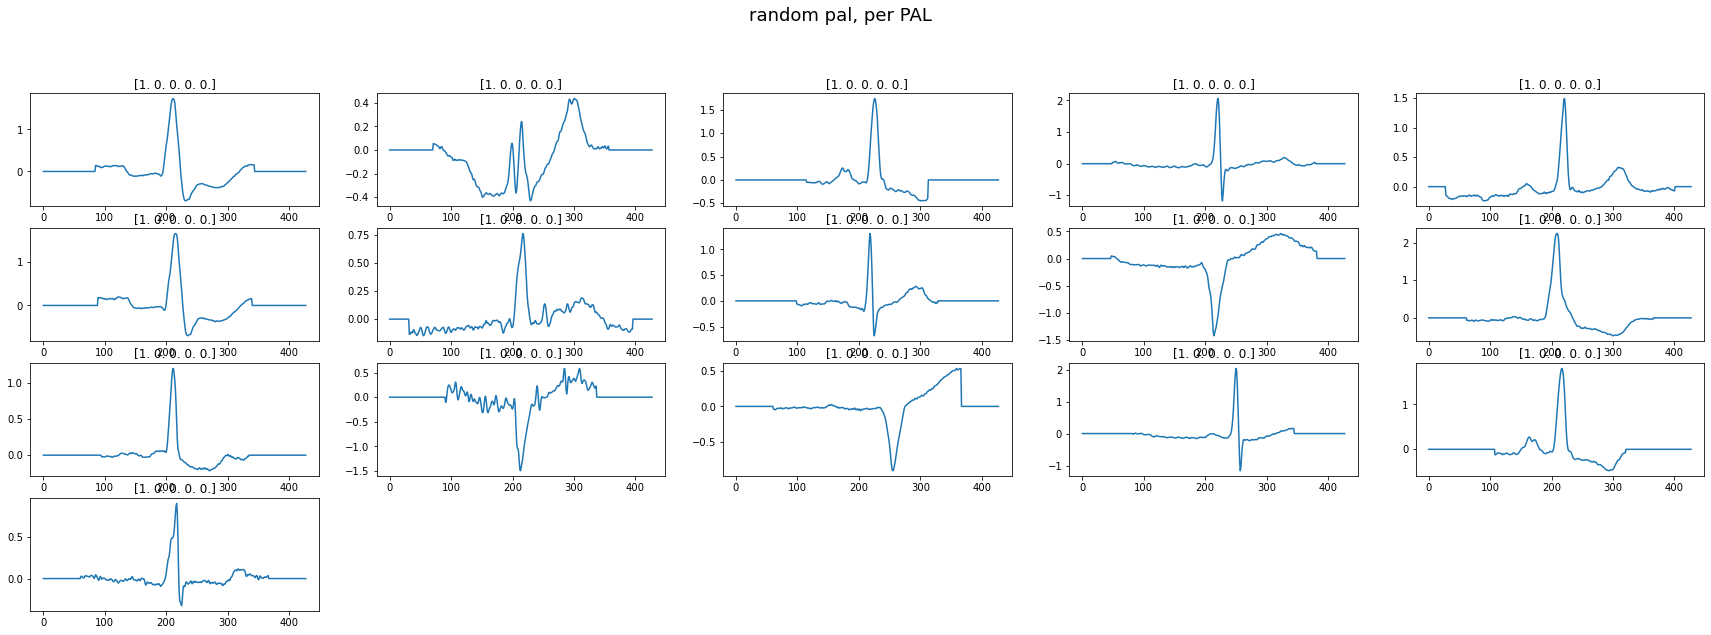

In [10]:
# 랜덤으로 뽑아서 뿌려보기

import matplotlib.pyplot as plt
import random
%matplotlib inline

plt.figure(figsize=(30, 12))
plt.suptitle("random pal, per PAL", fontsize=18)
n = 0
random.seed(11)
for i in random.sample(range(6480), 16):
    ax = plt.subplot(5, 5, n+1)
    plt.plot(npx[i])
    ax.set_title(str(npy[i]))
    n+=1

# 모델 생성

In [11]:
lefms = keras.Sequential([
    layers.Conv1D(32, 3, padding='same', input_shape=(428, 1)),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),

    layers.Conv1D(64, 3, padding='same'),
    layers.Conv1D(64, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),
    layers.MaxPool1D(pool_size=(2), strides=2),
    
    layers.Conv1D(64, 3, padding='same'),
    layers.Conv1D(64, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),
    layers.MaxPool1D(pool_size=(2), strides=2),
    
    layers.Conv1D(128, 3, padding='same'),
    layers.Conv1D(128, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),
    layers.MaxPool1D(pool_size=(2), strides=2),
    
    layers.Conv1D(128, 3, padding='same'),
    layers.Conv1D(128, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),
    layers.MaxPool1D(pool_size=(2), strides=2),
    
    layers.Conv1D(256, 3, padding='same'),
    layers.Conv1D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),
    layers.MaxPool1D(pool_size=(2), strides=2),
    
    layers.Conv1D(256, 3, padding='same'),
    layers.Conv1D(256, 3, padding='same'),
    layers.BatchNormalization(),
    layers.Activation(keras.activations.relu),
    layers.MaxPool1D(pool_size=(2), strides=2),

    layers.Reshape((1, 1536)),
    layers.Dropout(0.5),
    layers.GRU(1536),
    layers.Dense(192, activation='relu'),
    layers.Dense(5, activation='softmax')
])

2022-06-28 10:59:01.976903: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-28 10:59:01.977046: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [12]:
lefms.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 428, 32)           128       
                                                                 
 batch_normalization (BatchN  (None, 428, 32)          128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 428, 32)           0         
                                                                 
 conv1d_1 (Conv1D)           (None, 428, 64)           6208      
                                                                 
 conv1d_2 (Conv1D)           (None, 428, 64)           12352     
                                                                 
 batch_normalization_1 (Batc  (None, 428, 64)          256       
 hNormalization)                                        

In [13]:
lefms.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
)

# train, test, validation data 나누기

In [14]:
# # Train
# X_train = tf.convert_to_tensor(npx)
# X_train = tf.reshape(X_train, [7000, 428, 1])

# y_train = tf.convert_to_tensor(npy)
# y_train = tf.one_hot(y_train, 5)
# y_train = tf.reshape(y_train, [7000, 5])
# print("X_train shape : ",X_train.shape)
# print("y_train shape",y_train.shape)

# # Validation
# X_vali = tf.convert_to_tensor(npx_vali)
# X_vali = tf.reshape(X_vali, [990, 428, 1])

# y_vali = tf.convert_to_tensor(npy_vali)
# y_vali = tf.one_hot(y_vali, 5)
# y_vali = tf.reshape(y_vali, [990, 5])


# print("X_validation shape : ", X_vali.shape)
# print("y_validation shape : ", y_vali.shape)

# # Test
# X_test = tf.convert_to_tensor(npx_test)
# X_test = tf.reshape(X_test, [2010, 428, 1])

# y_test = tf.convert_to_tensor(npy_test)
# y_test = tf.one_hot(y_test, 5)
# y_test = tf.reshape(y_test, [2010, 5])
# print("X_test shape : ", X_test.shape)
# print("y_test shape : ", y_test.shape)

### 콜백 설정

In [15]:
# 콜백 설정
from keras.callbacks import EarlyStopping, ModelCheckpoint

outDir = './cheakpoint/lefms_model/' # 이 경로에 best 모델이 저장된다.
model_names = outDir + 'weights-{val_accuracy:.4f}.h5'
def get_callbacks(patience = 50):
    
    earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.0001, patience=patience)
  
    model_checkpoint = ModelCheckpoint(model_names, monitor='val_accuracy', verbose=1, save_best_only=True, period = 1)
  
    # callbacks = [earlystop, model_checkpoint]     # earlystop 사용하고 싶으면 이거 풀고 아래꺼 주석 처리
    callbacks = [model_checkpoint]

    return callbacks

# 학습하기

In [16]:
callbacks = get_callbacks()

lefms_hist = lefms.fit(X_train, Y_train, 
                        batch_size=BATCH_SIZE, 
                        epochs=100, 
                        validation_data=(X_val, y_val),
                        callbacks = [callbacks])

Epoch 1/100


2022-06-28 10:59:05.177615: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-28 10:59:06.696360: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:59:07.511382: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-28 10:59:07.631005: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


240/240 [==============================] - ETA: 0s - loss: 0.3225 - accuracy: 0.8888

2022-06-28 11:00:04.108287: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-28 11:00:04.385038: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.



Epoch 00001: val_accuracy improved from -inf to 0.26452, saving model to ./cheakpoint/lefms_model/weights-0.2645.h5
240/240 [==============================] - 61s 242ms/step - loss: 0.3225 - accuracy: 0.8888 - val_loss: 2.1441 - val_accuracy: 0.2645
Epoch 2/100
240/240 [==============================] - ETA: 0s - loss: 0.1396 - accuracy: 0.9545
Epoch 00002: val_accuracy improved from 0.26452 to 0.94227, saving model to ./cheakpoint/lefms_model/weights-0.9423.h5
240/240 [==============================] - 55s 230ms/step - loss: 0.1396 - accuracy: 0.9545 - val_loss: 0.1725 - val_accuracy: 0.9423
Epoch 3/100
240/240 [==============================] - ETA: 0s - loss: 0.1024 - accuracy: 0.9664
Epoch 00003: val_accuracy improved from 0.94227 to 0.95801, saving model to ./cheakpoint/lefms_model/weights-0.9580.h5
240/240 [==============================] - 53s 220ms/step - loss: 0.1024 - accuracy: 0.9664 - val_loss: 0.1145 - val_accuracy: 0.9580
Epoch 4/100
240/240 [============================

# 결과 시각화 하기

In [17]:
# 학습 된 모델의 학습 과정 시각화
import matplotlib.pyplot as plt
def plot_model__hist(hist):
    path = './cheakpoint/lefms/' # loss, accuracy 그래프 저장할 path
    createDirectory(path)

    # loss 추이 그래프로 그려서 저장
    plt.figure(figsize=(6,6))
    plt.style.use("ggplot")
    plt.plot(hist.history['loss'], color='b', label="Training loss")
    plt.plot(hist.history['val_loss'], color='r', label="Validation loss")
    plt.savefig(path + 'model_loss_hist.png')
    plt.legend()
    plt.show()

    # accuracy 추이 그래프로 그려서 저장
    plt.figure(figsize=(6,6))
    plt.style.use("ggplot")
    plt.plot(hist.history['accuracy'], color='b', label="Training accuracy")
    plt.plot(hist.history['val_accuracy'], color='r',label="Validation accuracy")
    plt.savefig(path + 'model_loss_hist.png')
    plt.legend(loc = "lower right")

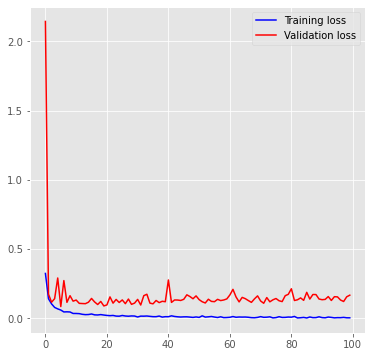

182/182 - 5s - loss: 0.1561 - accuracy: 0.9781 - 5s/epoch - 28ms/step
multi_model의 정확도: 97.81%
multi_model의 Loss: 0.15611770749092102


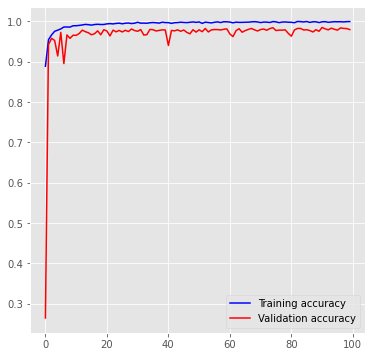

In [18]:
plot_model__hist(lefms_hist)
loss,acc = lefms.evaluate(X_test, y_test, verbose=2)
print("multi_model의 정확도: {:5.2f}%".format(100*acc))
print("multi_model의 Loss: {}".format(loss))

# 모델 불러와서 confusion matrix 그리기

In [20]:
# 모델 불러오기
reconstructed_model = keras.models.load_model("./cheakpoint/lefms_model/weights-0.9850.h5")

In [21]:
# 예측값 얻기
y_pred = reconstructed_model.predict(X_test)

2022-06-28 13:18:40.738624: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-28 13:18:41.049662: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [22]:
# one hat encoding 를 하나의 변수로 바꾸기
new_y= []
for val in y_test:
    max = 0
    cnt = 0
    for idx, num in enumerate(val):
        if max < num:
            max = num
            cnt = idx + 1
    new_y.append(cnt)

In [23]:
# one hat encoding 를 하나의 변수로 바꾸기
new_y_pred = []
for val in y_pred:
    max = 0
    cnt = 0
    for idx, num in enumerate(val):
        if max < num:
            max = num
            cnt = idx + 1
    new_y_pred.append(cnt)

In [24]:
# 최종 정확도 산출
score = reconstructed_model.evaluate(X_test, y_test, verbose=1)
print('정답률 = ', score[1],'loss=', score[0])

2022-06-28 13:18:46.116834: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


  6/182 [..............................] - ETA: 4s - loss: 0.0654 - accuracy: 0.9792

2022-06-28 13:18:46.446790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


182/182 [==============================] - 6s 32ms/step - loss: 0.1323 - accuracy: 0.9810
정답률 =  0.9810377359390259 loss= 0.13225314021110535


### confusion matrix 그리기

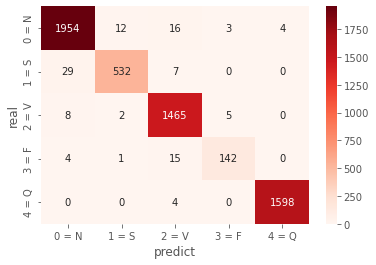

In [25]:
# 개수 버전
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns

cm2 = confusion_matrix(new_y, new_y_pred)
sns.heatmap(cm2, annot = True, fmt = 'd', cmap= 'Reds')
plt.xlabel('predict')
plt.ylabel('real')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0 = N', '1 = S', '2 = V', '3 = F', '4 = Q'])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0 = N', '1 = S', '2 = V', '3 = F', '4 = Q'])
plt.show()

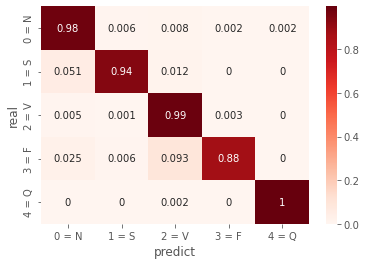

In [26]:
# percentile 버전
total = np.sum(cm2, axis=1)
cm2_percentile = cm2/total[:,None]
sns.heatmap(np.round(cm2_percentile,3), annot = True, cmap= 'Reds')
plt.xlabel('predict')
plt.ylabel('real')
plt.xticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0 = N', '1 = S', '2 = V', '3 = F', '4 = Q'])
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5], ['0 = N', '1 = S', '2 = V', '3 = F', '4 = Q'])
plt.show()

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(new_y, new_y_pred)

array([[1954,   12,   16,    3,    4],
       [  29,  532,    7,    0,    0],
       [   8,    2, 1465,    5,    0],
       [   4,    1,   15,  142,    0],
       [   0,    0,    4,    0, 1598]])

In [28]:
# classification_report 그리기
from sklearn.metrics import classification_report
target_names = ['0 = N', '1 = S', '2 = V', '3 = F', '4 = Q']
print(classification_report(new_y, new_y_pred, target_names=target_names))

              precision    recall  f1-score   support

       0 = N       0.98      0.98      0.98      1989
       1 = S       0.97      0.94      0.95       568
       2 = V       0.97      0.99      0.98      1480
       3 = F       0.95      0.88      0.91       162
       4 = Q       1.00      1.00      1.00      1602

    accuracy                           0.98      5801
   macro avg       0.97      0.96      0.96      5801
weighted avg       0.98      0.98      0.98      5801

